In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_excel('Coffee Shop Sales.xlsx')
print(sales.shape)

# Print (f"number of rows : {sales.shape[0]} and number of columns : {sales.shape[1]}")
# print(f"number of duplicated rows : {sales.duplicated().sum()}")
# print(f"Names of columns: {sales.columns}")
# print(sales.dtypes)

sales["total_sales"]=sales["unit_price"]*sales["transaction_qty"]
print(sales.head())



(149116, 11)
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  total_sales  
0  Gourmet brewed coffee    

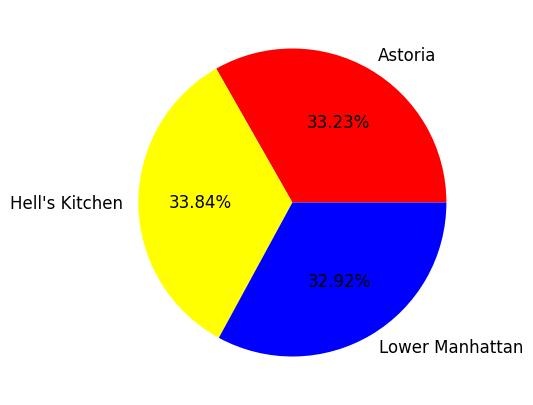

In [6]:
#finding the total sales as per store location
store_sales=pd.DataFrame(sales.groupby("store_location")["total_sales"].sum()).reset_index()
#plotting the pie chart with the help of matplotlib
plt.figure(figsize=(10,5))
plt.pie(store_sales["total_sales"],
        labels=store_sales["store_location"],
        autopct='%1.2f%%',
        colors=['red','yellow','blue'],
        textprops={'fontsize':12})
plt.show()

In [7]:
#print(sales["product_category"[.unique())
#date wise sales using input user for month year
month=input("Enter the month:")
#trend_sales=sales[sales["transaction_date"].dt.month==int(month)]
date_trend_sale=pd.DataFrame(sales[sales["transaction_date"].dt.month==int(month)].groupby(sales["transaction_date"].dt.date)["total_sales"].sum()).reset_index()
date_trend_sale["transaction_date"]=pd.to_datetime(date_trend_sale["transaction_date"])
print(date_trend_sale)
#plotting line chart
plt.figure(figsize=(15,10))
plt.plot(date_trend_sale['transaction_date'],date_trend_sale['total_sales'],
         marker='o',linestyle='-',color='red',label='Total sales')
plt.title('Month wise sales',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Total Sales',fontsize=14)
plt.grid(True,linestyle='--',alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'],labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'),rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

ValueError: invalid literal for int() with base 10: ''

In [ ]:
# Making one month columnn of month names
# insert syntax is sales.insert(index, column_name, value)

sales.insert(2, "month", sales["transaction_date"].dt.strftime("%B"))
sales.head()

In [ ]:
# Making a columns of day of week
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

sales.insert(5, "day_of_week", sales["transaction_date"].dt.strftime("%A"))
sales.head()

# Problem Statement 1
##### Question - Write a Python script that prompts the user to enter a month and a store location. Using a dataset containing "transaction_date" and "total_sales", filter the data to calculate total daily sales for the selected month and location. Then, visualize the sales trend using a line chart. Ensuring proper date formatting on the x-axis.

Empty DataFrame
Columns: [transaction_date, total_sales]
Index: []


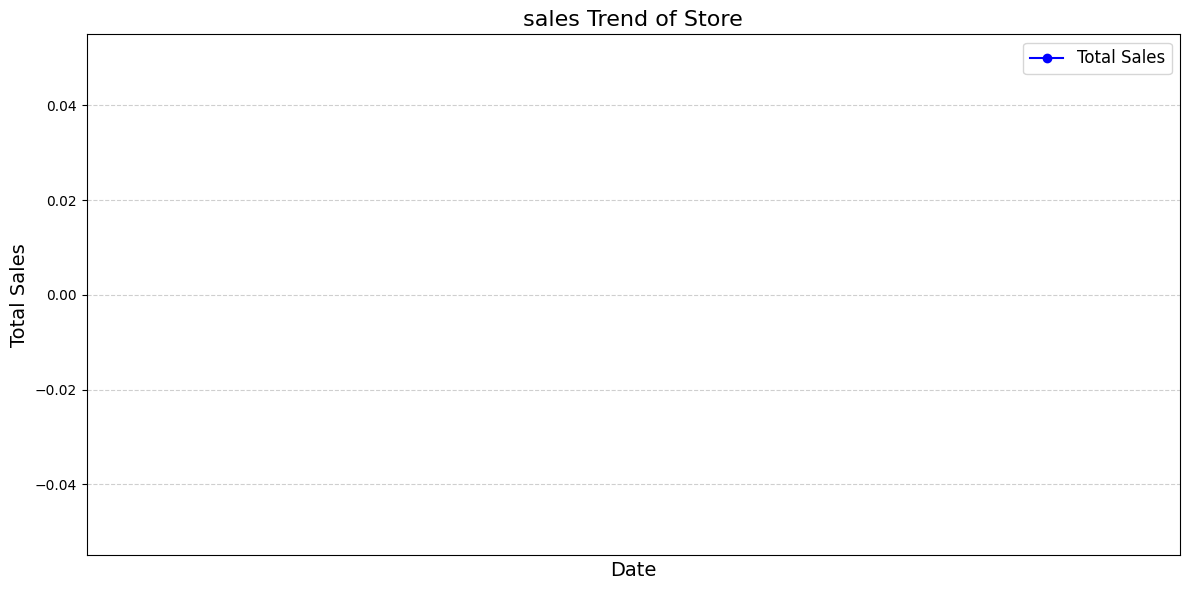

In [8]:
# Question - 1
# Datewise sales using input user for month year
month = input("Enter the month, 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December': ")
location = input("Enter the location'Lower Manhattan, Hell's Kitchen, Astoria : ")

# trend_sales = sales[sales["transaction_date"].dt.month == int(month)]
date_trend_sale = pd.DataFrame(sales[(sales["transaction_date"].dt.strftime("%B") == month) & 
                                     (sales["store_location"] == location)]
                                     .groupby(sales["transaction_date"].dt.date)["total_sales"].sum()).reset_index()
date_trend_sale["transaction_date"] = pd.to_datetime(date_trend_sale["transaction_date"])

print(date_trend_sale)


# Ploting Line Chart
plt.figure(figsize=(12,6))
plt.plot(date_trend_sale['transaction_date'], date_trend_sale['total_sales'], marker='o',linestyle='-', color='blue', label='Total Sales')
plt.title(f'{month} sales Trend of Store {location}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(date_trend_sale['transaction_date'], labels=date_trend_sale['transaction_date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Problem Statement 2
##### Question - Write a Python Script that prompts the user to enter a month and a product category. Using a dataset with "transaction_date","product_category", and "transaction_qty", filter the data to compute the total quantity sold for each product type within the selected month and category. Visualize the results using a bar chart, ensuring proper labelling and formatting

In [9]:
# Question - 2
month = input("Enter the month (in numbers) : ")
product_category = input("Enter the product_category,'Coffee'/'Tea'/'Drinking Chocolate'/'Bakery'/'Flavours'/'Loose Tea'/'Coffee beans'/'Package'")

qty_order_pt = pd.DataFrame(sales[sales["transaction_date"].dt.month == int(month) &
                                  (sales["product_category"] == product_category)].groupby("product_type")["transaction_qty"].sum()).reset_index()

qty_order_pt

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar_label(plt.bar(qty_order_pt['product_type'], qty_order_pt['transaction_qty'], color='green', label='Total Sales'))
plt.title(f'{month}sales Trend of Store {product_category}', fontsize=16)
plt.xlabel('Product Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(qty_order_pt['product_type'], labels=qty_order_pt['product_type'], rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

ValueError: invalid literal for int() with base 10: ''

### What is the trend of coffee vs Tea sales over time?


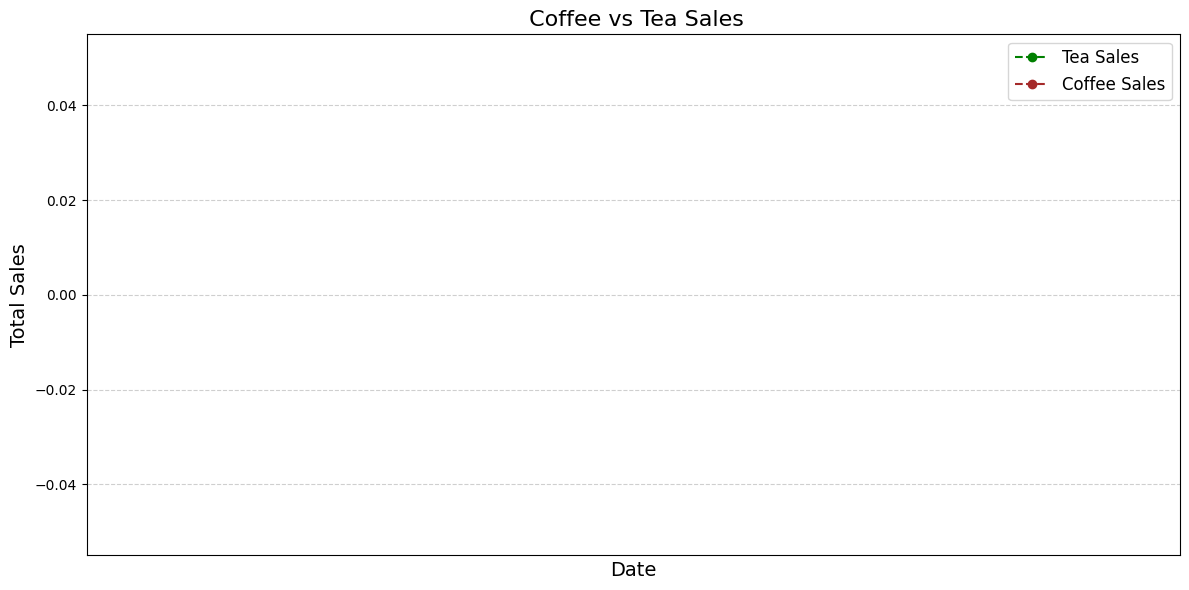

In [10]:
month=input("Enter the month ['January','February','March','April','May','June']: ")

tea_data= sales[(sales["product_category"] == "Tea") & (sales["transaction_date"].dt.strftime("%B") == month)].groupby("transaction_date")["total_sales"].sum().reset_index()
coffee_data= sales[(sales["product_category"] == "Coffee") & (sales["transaction_date"].dt.strftime("%B") == month)].groupby("transaction_date")["total_sales"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(tea_data['transaction_date'], tea_data['total_sales'], marker='o',linestyle='--', color='green', label='Tea Sales')
plt.plot(coffee_data['transaction_date'], coffee_data['total_sales'], marker='o',linestyle='--', color='brown', label='Coffee Sales')
plt.title(f'{month} Coffee vs Tea Sales', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(tea_data['transaction_date'], labels=tea_data['transaction_date'].dt.strftime('%Y-%m-%d'), rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

###


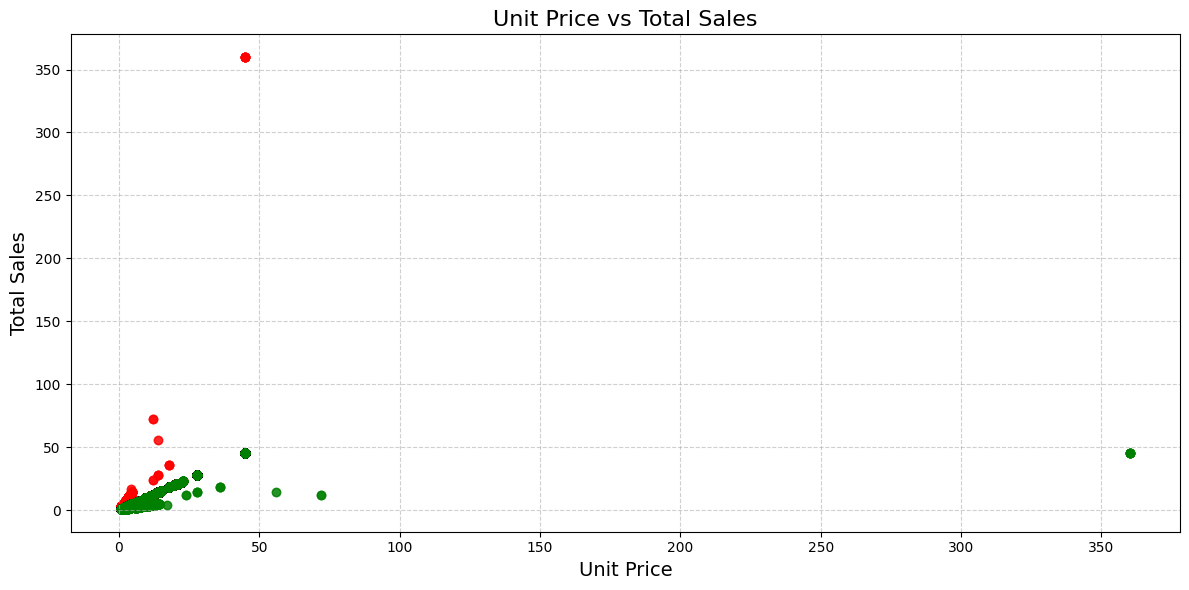

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(sales['unit_price'],sales['total_sales'],color='red',alpha=0.6,label="Unip Price")

#Plot total sales (Green)
plt.scatter(sales['total_sales'],sales['unit_price'],color='green',alpha=0.6, label="Total Sales")

plt.title('Unit Price vs Total Sales', fontsize=16)
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

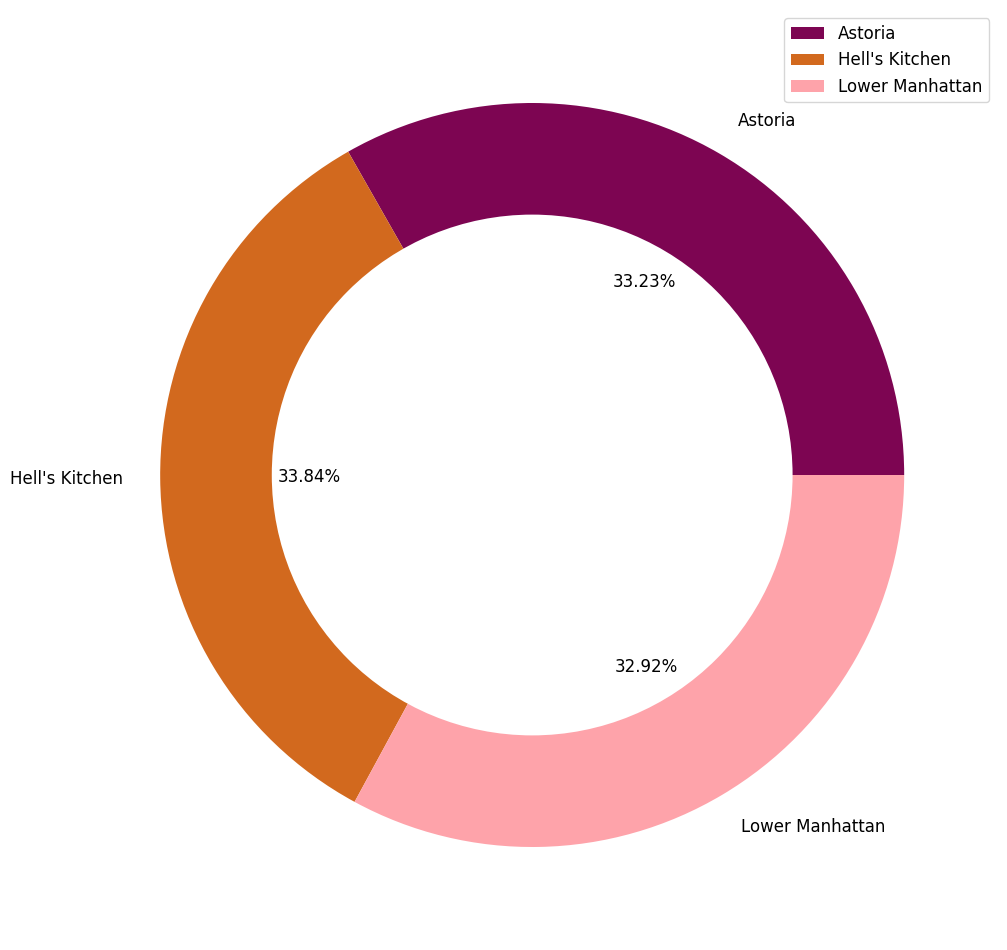

In [12]:
# Donut Chart
store_sales= pd.DataFrame(sales.groupby("store_location")["total_sales"].sum()).reset_index()
plt.figure(figsize=(12,14))
plt.pie(store_sales["total_sales"],
        labels=store_sales["store_location"],
        autopct='%1.2f%%',
        colors=["#7D0552",'#D2691E','#FEA3AA'],
        textprops={'fontsize': 12})
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.legend(fontsize=12, loc='upper right')
plt.show()

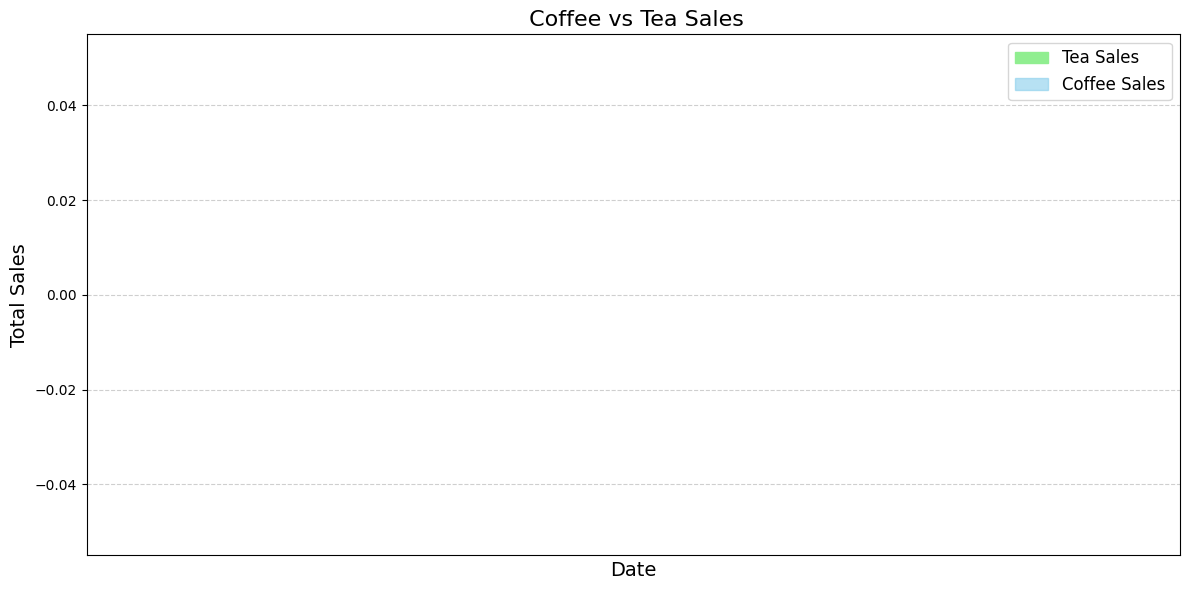

In [13]:
# Filled Area Chart
month =  input("Enter the month ['January', 'February', 'March', 'April', 'May', 'June']: ")

tea_data = sales[(sales["product_category"]=="Tea") &
                 (sales["transaction_date"].dt.strftime("%B") == month)].groupby("transaction_date")["total_sales"].sum().reset_index()

coffee_data = sales[(sales["product_category"] == "Coffee") &
                    (sales["transaction_date"].dt.strftime("%B") == month)].groupby("transaction_date")["total_sales"].sum().reset_index()

# Plotting the Graph
plt.figure(figsize=(12,6))

# Fill area means fill the area between the line and x-axis with color
plt.fill_between(tea_data['transaction_date'], tea_data['total_sales'], color = "lightgreen", alpha = 1, label = 'Tea Sales')
plt.fill_between(coffee_data['transaction_date'], coffee_data['total_sales'], color = "skyblue", alpha = 0.6, label = 'Coffee Sales')
plt.title(f'{month} Coffee vs Tea Sales', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total Sales', fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xticks(tea_data["transaction_date"], labels = tea_data['transaction_date'].dt.strftime('%Y-%m-%d'), rotation = 90)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

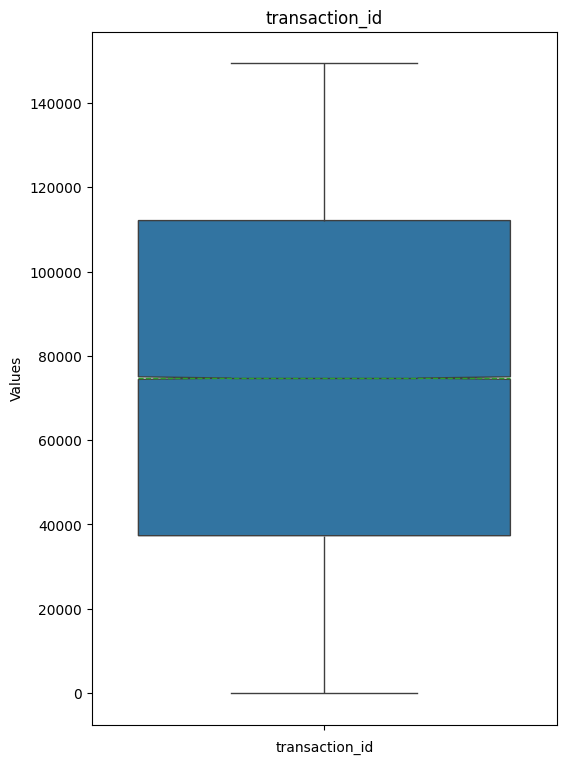

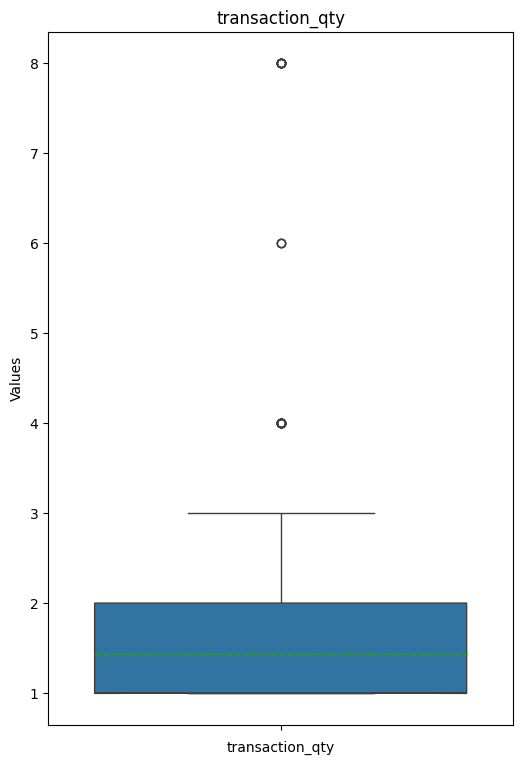

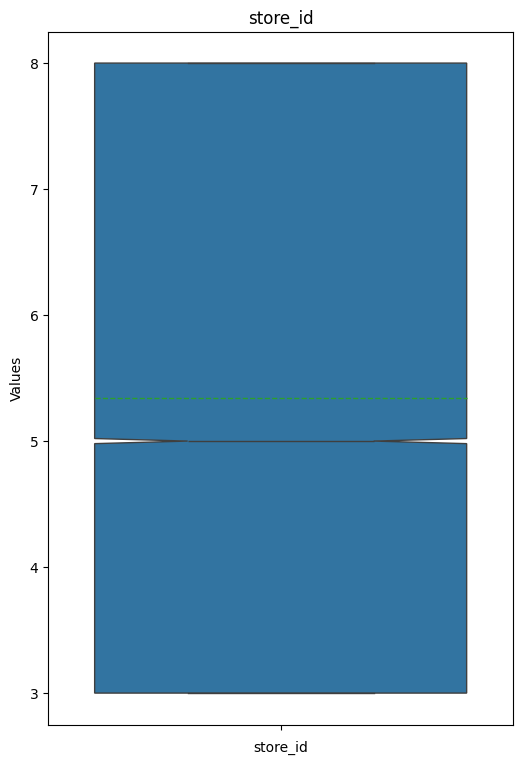

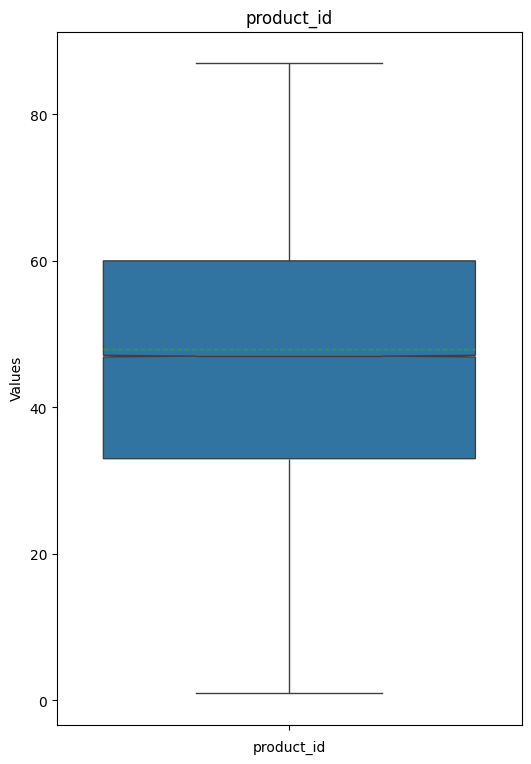

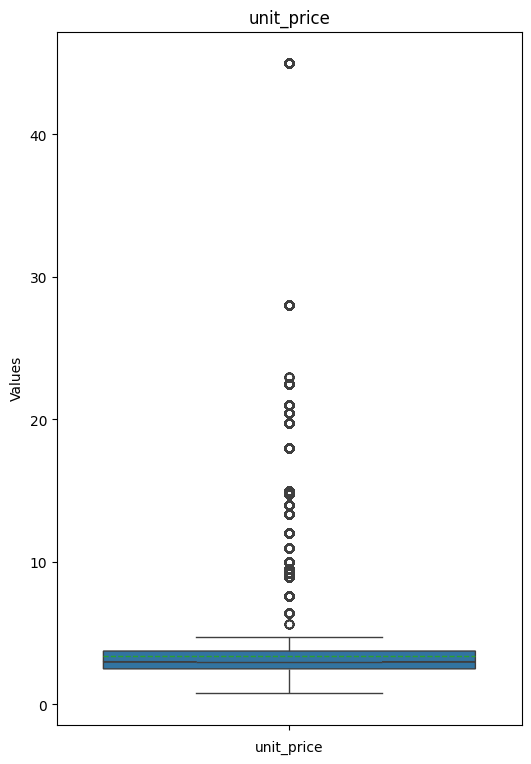

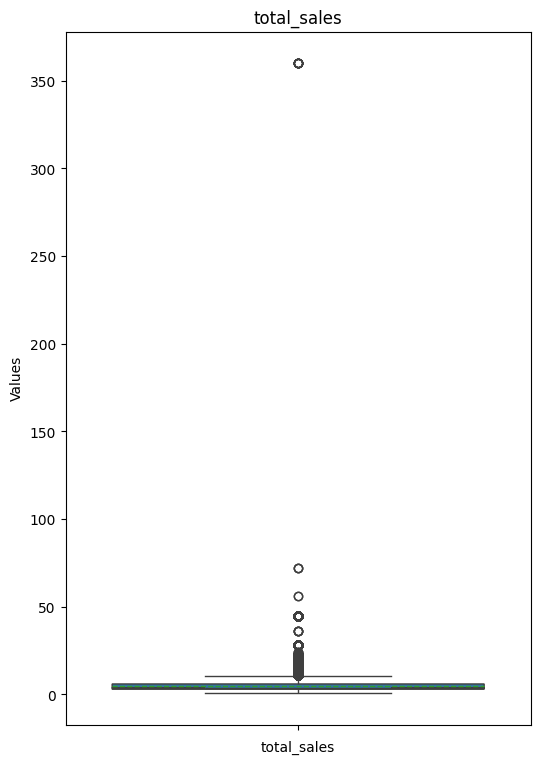

In [14]:
# Box Plot
for i in sales.select_dtypes(include="number"): # Loop through the columns in the data set which are of numeric data type and plot the box plot for each column
    plt.figure(figsize=(6,9))
    sns.boxplot(sales[i], patch_artist = True, notch = True, showmeans = True, meanline = True)
    # Plot the box plot for each column, patch_artist = True is used to fill the box plot with color,
    # notch = True is used to show the confidence interval,
    # showmeans = True is used to show the mean of the data,
    # meanline = True is used to show the mean line in the box plot
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.show()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

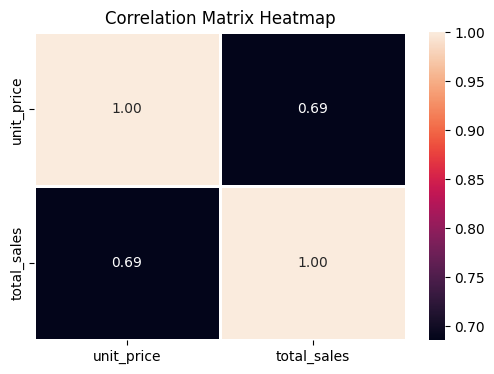

In [18]:
# Compute the correlation matrix
corr_matrix = sales[['unit_price','total_sales']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",linewidths=0.9)
plt.title("Correlation Matrix Heatmap")